In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
sns.set_theme(style="whitegrid")

df_1 = pd.read_excel('src/datasets/homicidios.xlsx', sheet_name='HECHOS')
df_2 = pd.read_excel('src/datasets/homicidios.xlsx', sheet_name='VICTIMAS')

In [446]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [109]:
df_1.info()
# Columns with null values: Altura, Cruce.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [401]:
df_1.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,COMUNA
count,695.000000,695,695.000000,695.000000,695.000000,695.000000
mean,1.030216,2018-09-15 04:10:42.302158336,2018.191367,6.686331,15.933813,7.435971
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000
25%,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,4.000000
50%,1.000000,2018-07-14 00:00:00,2018.000000,7.000000,16.000000,8.000000
75%,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,23.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,15.000000
std,0.179519,NaN,1.682915,3.570133,8.645513,4.381139


In [190]:
df_1.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,DIRECCION
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G..."
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,"PAZ, GRAL. AV. y DE LOS CORRALES AV."
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,ENTRE RIOS AV. 2034
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL."
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,"SAN JUAN AV. y SAENZ PEÑA, LUIS, PRES."


In [412]:
df_1['COMUNA'] = df_1['COMUNA'].astype('category')

In [174]:
# I see a pattern in the missing values for the "Direccion Normalizada" column, they are directions that can't be normalized under the USIG format, so, i will combine the columns "LUGAR_DEL_HECHO" and "Direccion Normalizada" to create only one directions column with the best posible values.
df_1[df_1['Dirección Normalizada'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


In [423]:
# I dropped this row because it's mostly null values and it doesn't add any valuable information to the dataset.
df_1.drop(index=119, axis=0, inplace=True)

In [418]:
# If possible, keep the normalized direction, if not, use the "LUGAR_DEL_HECHO" column to replace the missing value.

df_1['DIRECCION'] = df_1.apply(lambda x: x['Dirección Normalizada'] if not isinstance(x['Dirección Normalizada'], float) else x['LUGAR_DEL_HECHO'], axis=1)

In [419]:
# Fix an error in the format of the direction by replacing the problematic value.
df_1['DIRECCION'] = df_1['DIRECCION'].apply(lambda x: x.replace('Ã‘','Ñ'))

In [420]:
df_1['DIRECCION']

0      PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...
1                   PAZ, GRAL. AV. y DE LOS CORRALES AV.
2                                    ENTRE RIOS AV. 2034
3              LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.
4                 SAN JUAN AV. y SAENZ PEÑA, LUIS, PRES.
                             ...                        
691                                    RIESTRA AV. y MOM
692           DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.
693                                  GAONA AV. y TERRADA
694                                  PERON, EVA AV. 4071
695                              PADRE CARLOS MUGICA 709
Name: DIRECCION, Length: 696, dtype: object

In [421]:
# This columns are useless because i have their information present in other columns but in a better format.
df_1.drop(columns=['LUGAR_DEL_HECHO', 'Dirección Normalizada', 'Altura', 'Cruce', 'Calle', 'PARTICIPANTES'], inplace=True)

In [296]:
# Verify if there is any erroneous value in the column "DD" (Day)
print(f'This two values should be 31 if the data is in the right format {df_1["DD"].max()}, {len(df_1["DD"].value_counts().index)}')

This two values should be 31 if the data is in the right format 31, 31


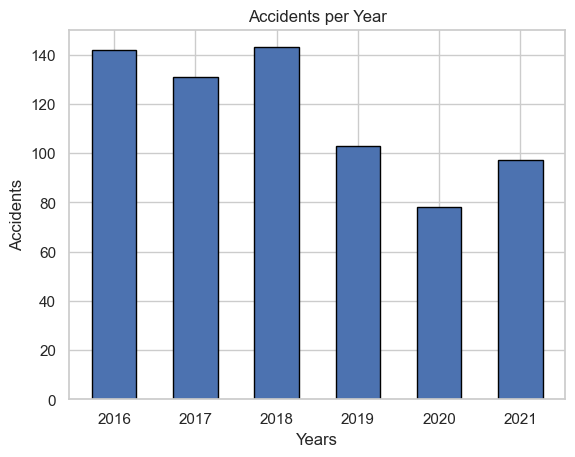

In [424]:
aux_df = df_1['AAAA'].value_counts()
category, values = aux_df.index, aux_df.values

fig, ax = plt.subplots()

ax.bar(category, values, width=0.55, edgecolor='black', linewidth=1)

plt.xlabel('Years')
plt.ylabel('Accidents')
plt.title('Accidents per Year')
plt.show()

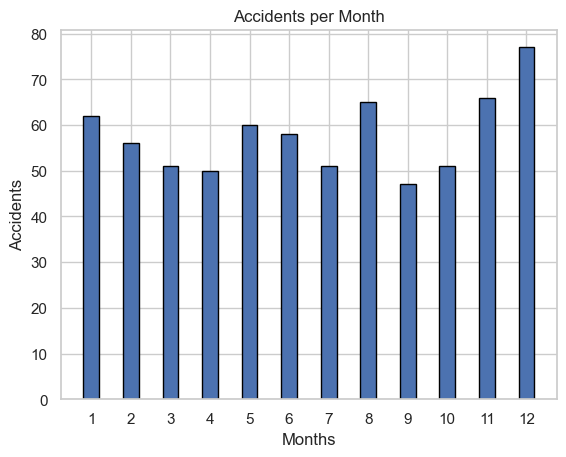

In [425]:
aux_df = df_1['MM'].value_counts()
category, values = aux_df.index, aux_df.values

fig, ax = plt.subplots()

ax.bar(category, values, width=0.4, edgecolor='black', linewidth=1)
ax.set_xticks(category)

plt.xlabel('Months')
plt.ylabel('Accidents')
plt.title('Accidents per Month')
plt.show()

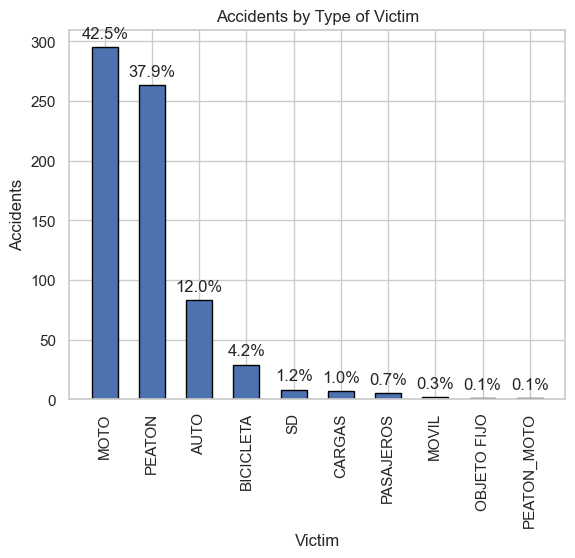

In [426]:
aux_df = df_1['VICTIMA'].value_counts()
category, values = aux_df.index, aux_df.values

fig, ax = plt.subplots()

ax.bar(category, values, width=0.55, edgecolor='black', linewidth=1)

for i, v in enumerate(values):
    percentage = (v / len(df_1)) * 100
    ax.text(i, v + 5, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Victim')
plt.xticks(rotation=90)
plt.ylabel('Accidents')
plt.title('Accidents by Type of Victim')
plt.show()

In [416]:
df_1[df_1['VICTIMA'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,...,NaN,"CHAVEZ, JORGE","PAZ, GRAL. AV. y CHAVEZ, JORGE",9,Point (93946.81673714 97681.68907836),-58.52932872,-34.65014993,SD-SD,SD,SD
88,2016-0115,1,2016-09-02,2016,9,2,11:50:00,11,ARIAS Y TRONADOR,CALLE,...,NaN,TRONADOR,ARIAS y TRONADOR,12,Point (97608.87024259 108884.67029908),-58.48935041,-34.54917673,SD-CARGAS,SD,CARGAS
92,2016-0119,1,2016-09-04,2016,9,4,06:40:00,6,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,...,NaN,TRIUNVIRATO AV.,"LARRALDE, CRISOLOGO AV. y TRIUNVIRATO AV.",12,Point (96944.69676081 107291.52292157),-58.49659234,-34.56353635,SD-SD,SD,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
164,2017-0029,1,2017-03-07,2017,3,7,02:15:00,2,MOZART Y TANDIL,CALLE,...,NaN,TANDIL,MOZART y TANDIL,9,Point (98009.35575364 97985.81952007),-58.48501341,-34.64742455,SD-AUTO,SD,AUTO
201,2017-0074,1,2017-06-04,2017,6,4,12:50:00,12,CASCO 133,CALLE,...,133.0,NaN,CASCO 133,9,Point (94281.31244858 99043.29027489),-58.52567073,-34.63787791,SD-SD,SD,SD
214,2017-0089,1,2017-07-13,2017,7,13,12:05:00,12,MARTINIANO LEGUIZAMON 901,CALLE,...,901.0,NaN,"LEGUIZAMON, MARTINIANO 901",9,Point (95246.78684010 97935.32361317),-58.51514709,-34.64787051,SD-AUTO,SD,AUTO
269,2017-0155,1,2017-12-12,2017,12,12,21:25:41,21,AV. RIVADAVIA 6350,AVENIDA,...,6350.0,NaN,RIVADAVIA AV. 6350,7,Point (100674.98109200 100299.64949548),-58.45593915,-34.62656868,SD-MOTO,SD,MOTO


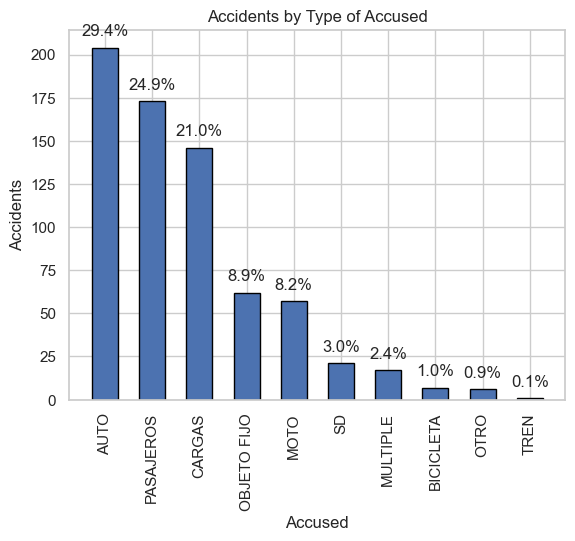

In [427]:
aux_df = df_1['ACUSADO'].value_counts()
category, values = aux_df.index, aux_df.values

fig, ax = plt.subplots()

ax.bar(category, values, width=0.55, edgecolor='black', linewidth=1)

for i, v in enumerate(values):
    percentage = (v / len(df_1)) * 100
    ax.text(i, v + 5, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Accused')
plt.xticks(rotation=90)
plt.ylabel('Accidents')
plt.title('Accidents by Type of Accused')
plt.show()

In [417]:
df_1[df_1['ACUSADO'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
32,2016-0045,1,2016-04-11,2016,4,11,10:25:00,10,AV GRAL PAZ Y AV DEL LIBERTADOR,GRAL PAZ,...,NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.46743471,-34.53476874,MOTO-SD,MOTO,SD
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
57,2016-0080,1,2016-06-18,2016,6,18,06:42:00,6,AV GRAL PAZ Y AV RIVADAVIA,GRAL PAZ,...,NaN,RIVADAVIA AV.,"PAZ, GRAL. AV. y RIVADAVIA AV.",9,Point (93950.50587297 98883.37644525),-58.52927982,-34.63931752,AUTO-SD,AUTO,SD
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,...,NaN,"CHAVEZ, JORGE","PAZ, GRAL. AV. y CHAVEZ, JORGE",9,Point (93946.81673714 97681.68907836),-58.52932872,-34.65014993,SD-SD,SD,SD
83,2016-0110,1,2016-08-24,2016,8,24,20:21:00,20,AV ALBERDI Y CARHUE,AVENIDA,...,NaN,CARHUE,"ALBERDI, JUAN BAUTISTA AV. y CARHUE",9,Point (95506.35959227 96696.89655626),-58.51232237,-34.65903530,PEATON-SD,PEATON,SD
92,2016-0119,1,2016-09-04,2016,9,4,06:40:00,6,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,...,NaN,TRIUNVIRATO AV.,"LARRALDE, CRISOLOGO AV. y TRIUNVIRATO AV.",12,Point (96944.69676081 107291.52292157),-58.49659234,-34.56353635,SD-SD,SD,SD
105,2016-0135,1,2016-10-24,2016,10,24,05:00:00,5,AV FIGUEROA ALCORTA Y PINEDO,AVENIDA,...,NaN,"PINEDO, INT.","FIGUEROA ALCORTA, PRES. AV. y PINEDO, INT.",14,Point (103734.76257993 107235.78328415),-58.42260225,-34.56403694,PEATON-SD,PEATON,SD
112,2016-0143,1,2016-11-06,2016,11,6,04:41:00,4,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-SD,MOTO,SD


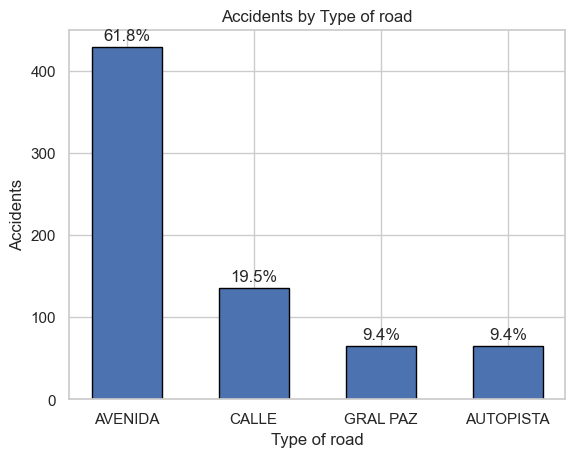

In [428]:
aux_df = df_1['TIPO_DE_CALLE'].value_counts()
category, values = aux_df.index, aux_df.values

fig, ax = plt.subplots()

ax.bar(category, values, width=0.55, edgecolor='black', linewidth=1)

for i, v in enumerate(values):
    percentage = (v / len(df_1)) * 100
    ax.text(i, v + 5, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Type of road')
plt.ylabel('Accidents')
plt.title('Accidents by Type of road')
plt.show()

In [317]:
# Approximately 26% of the accidents occurs between 5 and 9 AM
df_1['HH'].value_counts() / len(df_1['HH'])

HH
7     0.058993
6     0.057554
9     0.051799
5     0.050360
14    0.047482
12    0.046043
8     0.044604
18    0.044604
10    0.044604
16    0.043165
19    0.043165
17    0.043165
22    0.043165
21    0.041727
23    0.040288
11    0.038849
3     0.037410
15    0.035971
20    0.035971
1     0.034532
4     0.033094
0     0.033094
2     0.024460
13    0.024460
SD    0.001439
Name: count, dtype: float64

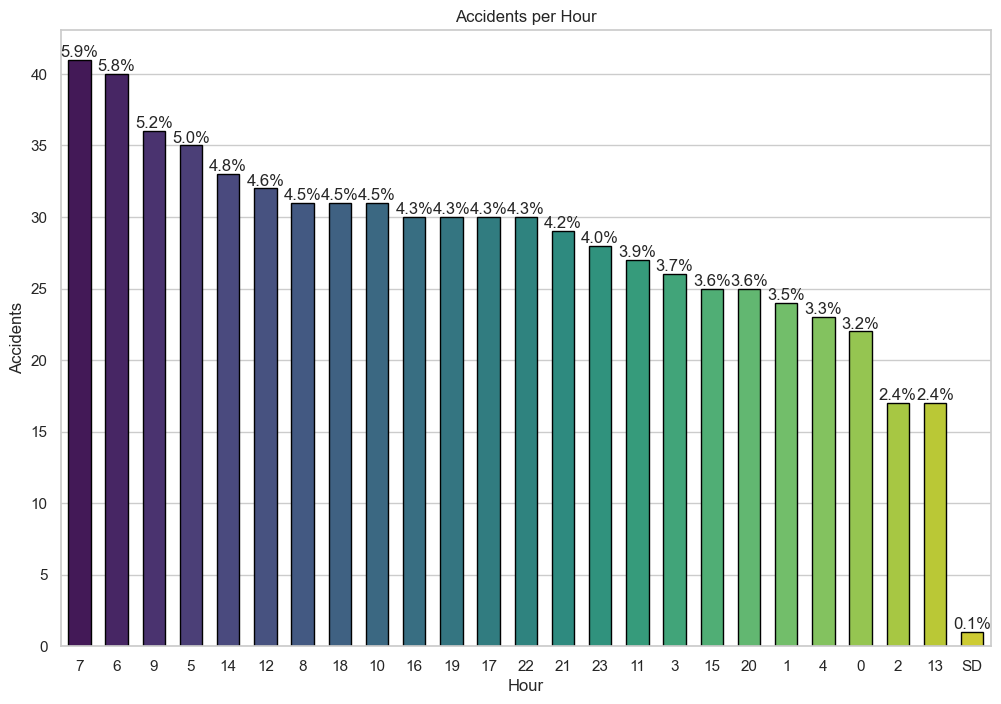

In [429]:
aux_df = df_1['HH'].value_counts()
category, values = aux_df.index, aux_df.values

fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=category, y=values, width=0.6, edgecolor='black', linewidth=1, palette='viridis', hue=category, legend=False)

for i, v in enumerate(values):
    percentage = (v / len(df_1)) * 100
    ax.text(i, v, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Hour')
plt.ylabel('Accidents')
plt.title('Accidents per Hour')
plt.show()

In [357]:
# See if there is something wrong with this accident.
# It's ok so i won't delete it

df_1[df_1['HH'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO,DIRECCION
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,GRAL PAZ,11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO,MOTO,"PAZ, GRAL. AV. y GRIVEO"


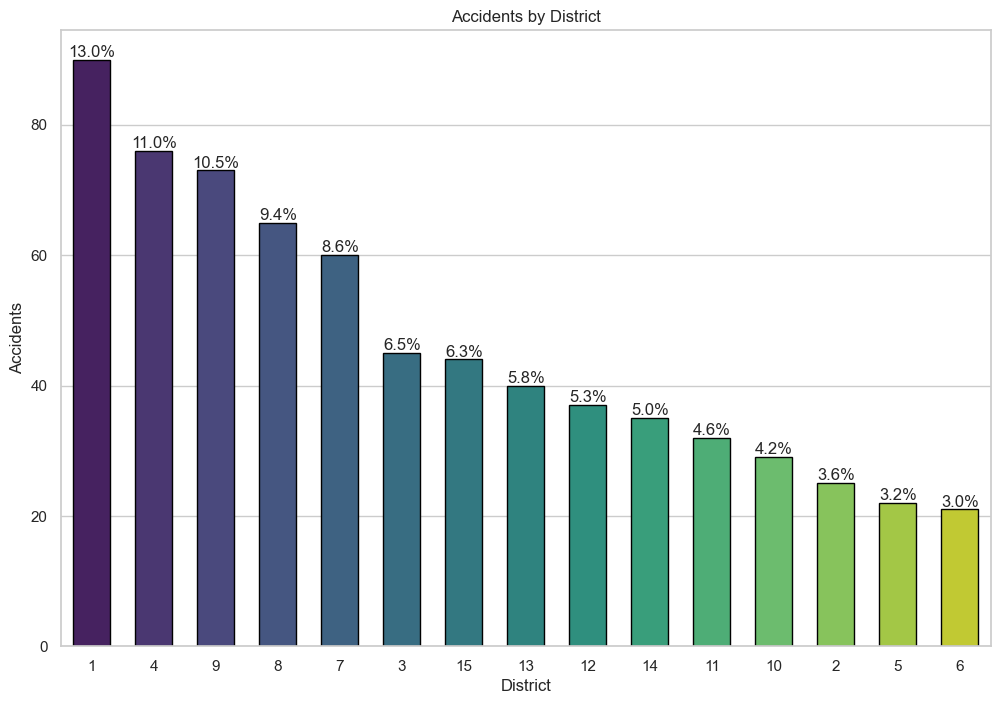

In [430]:
aux_df = df_1['COMUNA'].value_counts()
category, values = aux_df.index.astype('str'), aux_df.values

fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=category, y=values, width=0.6, edgecolor='black', linewidth=1, palette='viridis', hue=category, legend=False)

for i, v in enumerate(values):
    percentage = (v / len(df_1)) * 100
    ax.text(i, v, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('District')
plt.ylabel('Accidents')
plt.title('Accidents by District')
plt.show()

In [407]:
df_1[df_1['COMUNA'] == 0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO,DIRECCION
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA,0,Point (. .),.,.,SD,SD,AUTOPISTA 25 DE MAYO


In [422]:
# This row doesn't add relevant information to my dataset
df_1.drop(index=139, inplace=True)

In [452]:
print(f'Maximum amount of victims in a day: {df_1.groupby("FECHA")["N_VICTIMAS"].sum().max()}, it occurred the day {df_1.groupby("FECHA")["N_VICTIMAS"].sum().idxmax()}')

Maximum amount of victims in a day: 3, it occurred the day 2016-02-17 00:00:00


In [529]:
# The code for this table need to be optimized but for now i didn't find a different way to do it.

# We can see in the table that que number of victims is highly concentrated in the avenues and the main responsibles are cars and public transport

pd.pivot_table(df_1, index=['TIPO_DE_CALLE', 'ACUSADO'], values='N_VICTIMAS', aggfunc='sum').reset_index(level=1).sort_values(by=['TIPO_DE_CALLE', 'N_VICTIMAS'], ascending=[True, False]).reset_index().set_index(['TIPO_DE_CALLE', 'ACUSADO'])

N_VICTIMAS
TIPO_DE_CALLE ACUSADO                
AUTOPISTA     CARGAS               23
              AUTO                 17
              OBJETO FIJO          13
              MOTO                  5
              PASAJEROS             4
              SD                    3
              MULTIPLE              2
AVENIDA       AUTO                127
              PASAJEROS           126
              CARGAS               85
              MOTO                 40
              OBJETO FIJO          37
              MULTIPLE             10
              SD                   10
              OTRO                  4
              BICICLETA             3
CALLE         AUTO                 43
              PASAJEROS            38
              CARGAS               30
              MOTO                  9
              OBJETO FIJO           7
              BICICLETA             4
              MULTIPLE              2
              SD                    2
              OTRO                  1
              TREN                  1
GRAL PAZ      AUTO                 23
              CARGAS               12
              OBJETO FIJO          10
              PASAJEROS            10
              SD                    6
              MOTO                  4
              MULTIPLE              3
              OTRO                  1

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [433]:
df_2.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [432]:
df_2[df_2['ID_hecho'].isin(('2016-0151','2016-0174'))] # See if there is any extra information for the problematic values that we find in the fact dataset

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
121,2016-0151,2016-11-18,2016,11,18,PEATON,PEATON,SD,SD,SD
141,2016-0174,2016-12-27,2016,12,27,SD,SD,SD,SD,SD
